<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Dima!👋 How are you today?</b>
    
My name is Arina U. and I am glad to be your reviewer in this project! Nice to meet you!💪😎<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this <a class="tocSkip"> </div>
    
OK, now let's go!😏
</font>

In [1]:
#pip install psycopg2-binary 


## Step1  Download the data and prepare it for analysis

In [2]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [3]:
db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Step2 Download the data and prepare it for analysis

### 2.1 Table "books"


In [4]:
query = """
SELECT *
FROM books
limit 5
"""

In [5]:
results = pd.io.sql.read_sql(query, con = engine)

display(results)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


### 2.2 Table "authors"

In [6]:
query = """
SELECT *
FROM authors
limit 5
"""

In [7]:
results = pd.io.sql.read_sql(query, con = engine)

display(results)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


### 2.3 Table "publishers"

In [8]:
query = """
SELECT *
FROM publishers
limit 5
"""

In [9]:
results = pd.io.sql.read_sql(query, con = engine)

display(results)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


### 2.4 Table "ratings"

In [10]:
query = """
SELECT *
FROM ratings
limit 5
"""

In [11]:
results = pd.io.sql.read_sql(query, con = engine)

display(results)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


### 2.5 Table "reviews"

In [12]:
query = """
SELECT *
FROM reviews
limit 5
"""

In [13]:
results = pd.io.sql.read_sql(query, con = engine)

display(results)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, you managed to investigate the data in detail let's move on!
</div>

## Step 3. Tasks

### 3.1 Number of books published after January 1, 2000


In [14]:
query_task1 = """
-- Find the number of books released after January 1, 2000.
SELECT COUNT(*) as count_books
FROM books
WHERE publication_date > '2000-01-01';  
"""
results = pd.io.sql.read_sql(query_task1, con = engine)
display(results)

,count_books
0,819


**After performing the query, we found out that 819 books were published after 01/01/2000**

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Correct result here!
</div>

### 3.2 Find out the number of user reviews and the average rating for each book.

In [15]:
query_task2 = """
-- Find the number of user reviews and the average rating for each book.
SELECT books.book_id, 
    authors.author,
    books.title, 
    COUNT(review_id) as number_users_reviews, 
    ROUND(AVG(ratings.rating),2) as average_rating
FROM books
    left join reviews on books.book_id = reviews.book_id 
    left join ratings on books.book_id = ratings.book_id 
    left join authors on books.author_id = authors.author_id 
group by books.book_id, authors.author_id
order by number_users_reviews desc 
"""
results = pd.io.sql.read_sql(query_task2, con = engine)
display(results)

,book_id,author,title,number_users_reviews,average_rating
0,948,Stephenie Meyer,Twilight (Twilight #1),1120,3.66
1,750,J.R.R. Tolkien,The Hobbit or There and Back Again,528,4.13
2,673,J.D. Salinger,The Catcher in the Rye,516,3.83
3,302,J.K. Rowling/Mary GrandPré,Harry Potter and the Prisoner of Azkaban (Harr...,492,4.41
4,299,J.K. Rowling/Mary GrandPré,Harry Potter and the Chamber of Secrets (Harry...,480,4.29
...,...,...,...,...,...
995,221,Edgar Allan Poe/Benjamin F. Fisher,Essential Tales and Poems,0,4.00
996,808,Kimon Nicolaides/Mamie Harmon,The Natural Way to Draw,0,3.00
997,83,Faye Perozich/Anne Rice/John Bolton/Daerick Gröss,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
998,387,Leonardo da Vinci/H. Anna Suh,Leonardo's Notebooks,0,4.00


**We processed the data and formed a table in which we counted the number of reviews for each book and the average book rating.**



<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
        
Here your result is not very correct, look at the expected result for this task
        
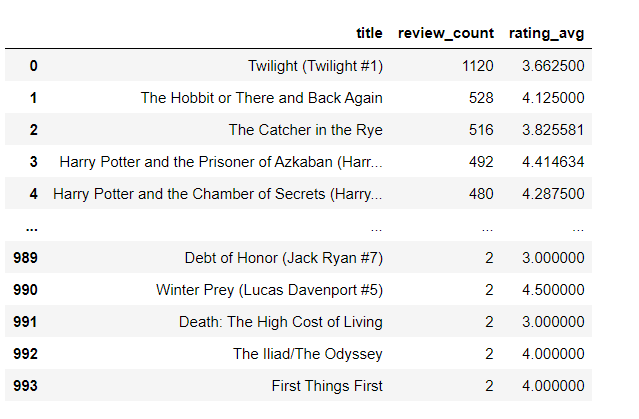
        
so now the number os users review is lower than expected. We can get the lower number of the review than expected when we calculate the DISITINCT count of the review, i.e. unique. In this task contrary we need to calculate all the reviews, the repeated too per each book.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Dima, this time the result is correct! Agree with your improvements here:)
</div>

#### 3.3 Identify the publisher with the most books with more than 50 pages.


In [16]:
query_task3 = """
-- Identify the publisher that has released the greatest number of books with more than 50 pages
select 
    distinct publishers.publisher_id 
    , publishers.publisher
    , COUNT(books.book_id) OVER(PARTITION BY publishers.publisher_id) AS count_books 
from books 
    inner join publishers using(publisher_id)
where books.num_pages > 50
order by count_books desc
limit 1
"""
results = pd.io.sql.read_sql(query_task3, con = engine)
display(results[:5])

,publisher_id,publisher,count_books
0,212,Penguin Books,42


**After performing the query, we found out that the Penguin Books publisher has released the most books.**



<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, I can agree with your decision here, good job!
</div>

### 3.4 Identify the author with the highest average book rating.


##### 3.4.1 The author of the book with the highest rating.


In [17]:
query_task4 = """
-- Identify the author with the highest average book rating (look only at books with at least 50 ratings).
with books_rating(book_id,title,author,count_marks,avg_rating)
as (
select 
   distinct book_id
   , books.title 
   , authors.author 
   , count(rating_id) over (partition by book_id) as count_marks
   , round(avg(rating) over (partition by book_id),2) as avg_rating
from books 
    left join ratings using(book_id)
    left join authors using(author_id)
)
select 
    book_id
    , title
    , author
    , avg_rating
from books_rating
where 
    (count_marks > 50) and avg_rating = 
       (
        select avg_rating 
        from books_rating
        where count_marks > 50
        order by avg_rating desc
        limit 1
        )
"""
results = pd.io.sql.read_sql(query_task4, con = engine)
display(results[:5])

,book_id,title,author,avg_rating
0,302,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.41


**After performing the query, we found out that J.K. Rowling is the author of the top-rated book itself.**



<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Absolutely right!
</div>

#### 3.4.2 Author of top-rated books.


In [18]:
query_task4_1 = '''
SELECT
    authors.author,
    AVG(subquery_ratings.avg_rating) AS average_rating
FROM
    books
    LEFT JOIN (
        SELECT 
            book_id,
            AVG(rating) AS avg_rating,
            COUNT(rating) AS rating_qty
        FROM
            ratings
        GROUP BY
            book_id
    ) AS subquery_ratings ON subquery_ratings.book_id = books.book_id
    LEFT JOIN authors ON authors.author_id = books.author_id
WHERE
    rating_qty > 50
GROUP BY
    author
ORDER BY
    average_rating DESC
LIMIT 1
'''
results = pd.io.sql.read_sql(query_task4_1, con = engine)
display(results[:5])

,author,average_rating
0,J.K. Rowling/Mary GrandPré,4.283844


**After completing the request, we found out that J.K. Rowling is the author whose books have the highest ratings.**




<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
The code is repeated here, it is better to remove the dublicated code.
</div>

### 3.5 Find the average number of text reviews among users who rated more than 50 books.


In [19]:
query_task5 = """
-- Task 5. Find the average number of text reviews among users who rated more than 50 books. 
with users_rated_50_plus (username)
as (
select 
   ratings.username 
from ratings 
group by username
having count(rating_id) > 50
),
users_count_reviews (username, count_reviews)
as (
    SELECT 
        distinct username
        , COUNT(review_id) over (partition by username) as count_reviews
    from users_rated_50_plus
        inner join reviews USING(username)
)
select ROUND(AVG(count_reviews),2) as AVG_REVIEWS 
from users_count_reviews
"""
results = pd.io.sql.read_sql(query_task5, con = engine)
display(results[:5])


,avg_reviews
0,24.33


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Correct!
</div>

**After performing the query, we found out that, on average, users make 24.33 reviews.**



<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Dima, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done. But there are several things in your project which I suppose it is important to fix, my comments will navigate you.


**Good things and practices in your project I want to highlight🙂**:

* You used different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* It is great that you formulated conclusions and explanations after each step of the analysis.

    
**What is worth working on👀**:

* all the recommendations you can find in my comments, please, try to work on them, one query needs to be improved.


**Good luck! I will wait for your work for a second iteration of the review!😉**
![gif](https://media.giphy.com/media/VbnUQpnihPSIgIXuZv/giphy.gif)  

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: second iteration of the review**

Dima, thank you for submitting your project with corrections!😉 
    
You did a great job to improve the project, I can see your progress, so I hasten to say that your project has been accepted and you can proceed to the next sprint!
    
**I wish you exciting and cool projects in the next sprints!**